# SECTION 1:
* LOAD MERGED DATASET: this was saved on the ETL page into a .csv file for easy manipulation on jupyter notebook

In [21]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
import plotly.express as px # visualization
import matplotlib.pyplot as plt # plotting

In [22]:
df_merged = pd.read_csv('merged_dataset.csv')
df_merged.head()

,Country,Year,Estimated Cases,Estimated Deaths,No. of cases_median,No. of cases_min,No. of cases_max,No. of deaths_median,No. of deaths_min,No. of deaths_max,Reported Cases,Reported Deaths,Malaria Incidence,WHO Region
0,Afghanistan,2017,630308[495000-801000],298[110-510],630308,495000.0,801000.0,298,110.0,510.0,161778.0,10.0,27.07,Eastern Mediterranean
1,Algeria,2017,0,0,0,498000.0,1389000.0,0,390.0,3565.0,0.0,0.0,0.00,Africa
2,Angola,2017,4615605[3106000-6661000],13316[9970-16600],4615605,3106000.0,6661000.0,13316,9970.0,16600.0,3874892.0,13967.0,228.91,Africa
3,Argentina,2017,0,0,0,498000.0,1389000.0,0,390.0,3565.0,0.0,1.0,0.00,Americas
4,Armenia,2017,0,0,0,498000.0,1389000.0,0,390.0,3565.0,0.0,1.0,0.00,Europe


# SECTION 2:
* DESCRIPTIVE ANALYSIS; to understand the malaria trends across multiple countries, the following analysis are done to check for the data structiure of the merged data, if there are any discrepancies needed to fix.

# STATISTICAL SUMMARY

 Summary of the Numeric Data

In [23]:
#gives a summary of the numerical columns 
print(df_merged.describe())

              Year  No. of cases_median  No. of cases_min  No. of cases_max  \
count   856.000000         8.560000e+02      8.560000e+02      8.560000e+02   
mean   2013.500000         2.081990e+06      1.552671e+06      3.629022e+06   
std       2.292627         6.381892e+06      4.365077e+06      8.950683e+06   
min    2010.000000         0.000000e+00      3.000000e+01      4.000000e+01   
25%    2011.750000         2.385000e+02      1.997500e+05      4.637500e+05   
50%    2013.500000         3.752100e+04      4.980000e+05      1.389000e+06   
75%    2015.250000         1.656628e+06      8.857500e+05      2.697750e+06   
max    2017.000000         6.202089e+07      4.388000e+07      8.484000e+07   

       No. of deaths_median  No. of deaths_min  No. of deaths_max  \
count            856.000000         856.000000         856.000000   
mean            4713.880841        3590.996495        7595.655374   
std            13183.312889       10348.503549       16101.378050   
min         

Categorical Summary

In [24]:
# shows categorical columns
print(df_merged['Country'].nunique(), "countries in dataset")  
print(df_merged['Country'].unique())  # List of unique countries


107 countries in dataset
['Afghanistan' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Azerbaijan'
 'Bangladesh' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Botswana' 'Brazil' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Central African Republic' 'Chad' 'China' 'Colombia' 'Comoros'
 'Congo' 'Costa Rica' "Côte d'Ivoire"
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Djibouti' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Eswatini'
 'Ethiopia' 'Gabon' 'Gambia' 'Georgia' 'Ghana' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'India' 'Indonesia'
 'Iran (Islamic Republic of)' 'Iraq' 'Kazakhstan' 'Kenya' 'Kyrgyzstan'
 "Lao People's Democratic Republic" 'Liberia' 'Madagascar' 'Malawi'
 'Malaysia' 'Mali' 'Mauritania' 'Mexico' 'Morocco' 'Mozambique' 'Myanmar'
 'Namibia' 'Nepal' 'Nicaragua' 'Niger' 'Nigeria' 'Oman' 'Pakistan'
 'Panama' 'Papua New Guinea' 'Paraguay' 'Peru' 'Phil

# HANDLING MISSING/NEGATIVE VALUES

Check For Outliers (negative values)

In [25]:
# Check for negative values in case and death estimates
negative_values = df_merged[
    (df_merged[['No. of cases_median', 'No. of cases_min', 'No. of cases_max', 
                'No. of deaths_median', 'No. of deaths_min', 'No. of deaths_max']] < 0).any(axis=1)
]

if negative_values.empty:
    print("✅ No negative values found in case or death estimates.")
else:
    print("⚠️ Negative values found in case or death estimates:")
    print(negative_values)


✅ No negative values found in case or death estimates.


Missing Values

In [26]:
#Checks for any missing values in the merged dataset
print("Missing values in the dataset:")
print(df_merged.isnull().sum())


Missing values in the dataset:
Country                 0
Year                    0
Estimated Cases         0
Estimated Deaths        0
No. of cases_median     0
No. of cases_min        0
No. of cases_max        0
No. of deaths_median    0
No. of deaths_min       0
No. of deaths_max       0
Reported Cases          0
Reported Deaths         0
Malaria Incidence       0
WHO Region              0
dtype: int64


The merged dataset is clean with no missing values, no duplicates or any negative values. This shows the quality of data is good and appropriate for furtrher analysis.

Check the numeric columns data type

In [27]:


# Ensure correct data types
df_merged['Year'] = pd.to_numeric(df_merged['Year'], errors='coerce').astype('Int64')
df_merged['Estimated Cases'] = pd.to_numeric(df_merged['Estimated Cases'], errors='coerce')
df_merged['Reported Cases'] = pd.to_numeric(df_merged['Reported Cases'], errors='coerce')
df_merged.head()



,Country,Year,Estimated Cases,Estimated Deaths,No. of cases_median,No. of cases_min,No. of cases_max,No. of deaths_median,No. of deaths_min,No. of deaths_max,Reported Cases,Reported Deaths,Malaria Incidence,WHO Region
0,Afghanistan,2017,NaN,298[110-510],630308,495000.0,801000.0,298,110.0,510.0,161778.0,10.0,27.07,Eastern Mediterranean
1,Algeria,2017,0.0,0,0,498000.0,1389000.0,0,390.0,3565.0,0.0,0.0,0.00,Africa
2,Angola,2017,NaN,13316[9970-16600],4615605,3106000.0,6661000.0,13316,9970.0,16600.0,3874892.0,13967.0,228.91,Africa
3,Argentina,2017,0.0,0,0,498000.0,1389000.0,0,390.0,3565.0,0.0,1.0,0.00,Americas
4,Armenia,2017,0.0,0,0,498000.0,1389000.0,0,390.0,3565.0,0.0,1.0,0.00,Europe


Verification Of Dataset Values: checks for scaling


In [28]:
#show min,max,mean and percentiles for both to see if their values are on different scales.
print(df_merged[['Estimated Cases', 'Reported Cases']].describe())


       Estimated Cases  Reported Cases
count       312.000000    8.560000e+02
mean       2199.551282    6.652528e+05
std        6934.423910    1.733589e+06
min           0.000000    0.000000e+00
25%           0.000000    2.300000e+02
50%           7.000000    1.763950e+04
75%         552.500000    3.497718e+05
max       53156.000000    1.533084e+07


# MALARIA TREND OVER THE YEARS

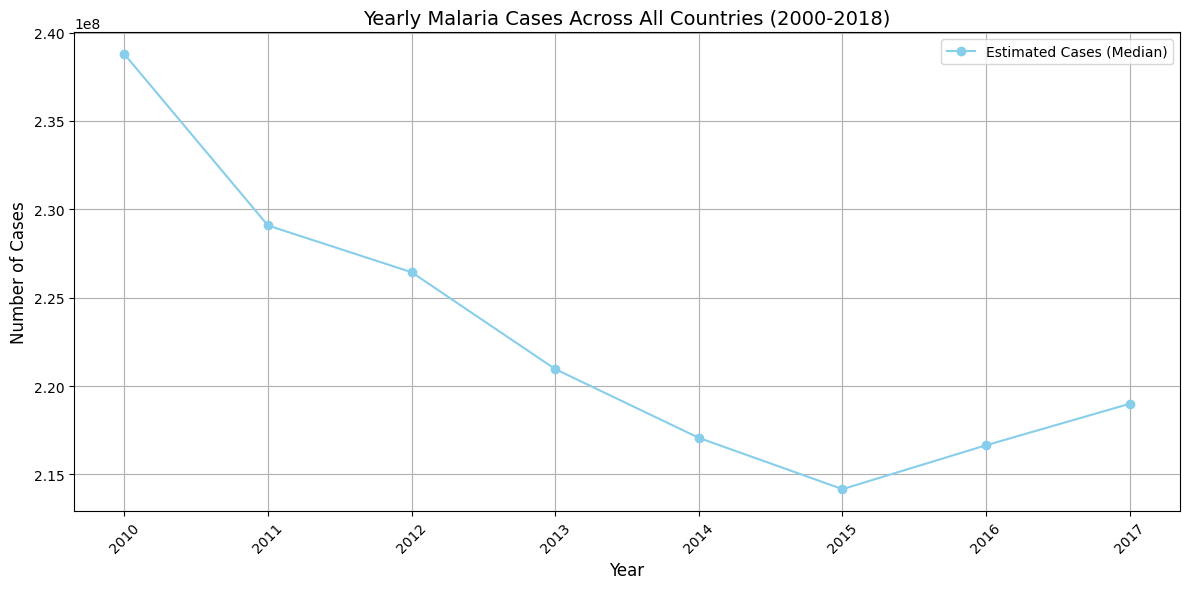

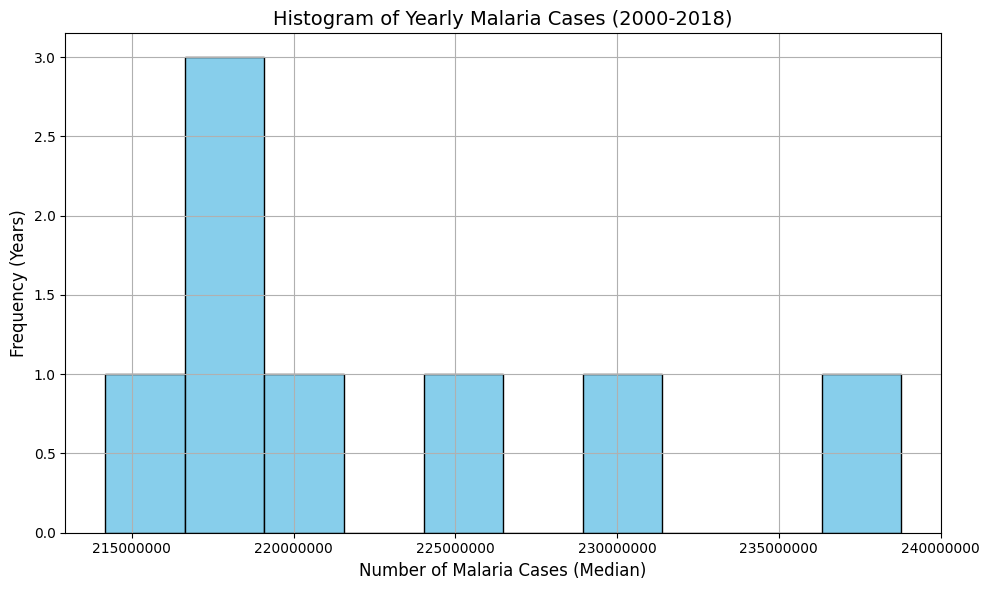

In [29]:

# Convert 'Year' to numeric if it's not already
df_merged['Year'] = pd.to_numeric(df_merged['Year'], errors='coerce')

# Filter data for the years 2000-2018 (inclusive)
df_merged_filtered = df_merged[(df_merged['Year'] >= 2000) & (df_merged['Year'] <= 2018)]

# Convert 'No. of cases_median' to numeric, handling errors
df_merged_filtered['No. of cases_median'] = pd.to_numeric(df_merged_filtered['No. of cases_median'], errors='coerce')

# Group by 'Year' and sum 'No. of cases_median'
yearly_cases = df_merged_filtered.groupby('Year')[['No. of cases_median']].sum()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(yearly_cases.index, yearly_cases['No. of cases_median'], marker='o', linestyle='-', color='skyblue', label='Estimated Cases (Median)')

# Adding labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.title('Yearly Malaria Cases Across All Countries (2000-2018)', fontsize=14)
plt.grid(True)
plt.legend(fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

# Create a histogram for yearly malaria cases
plt.figure(figsize=(10, 6))
plt.hist(yearly_cases, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Number of Malaria Cases (Median)', fontsize=12)
plt.ylabel('Frequency (Years)', fontsize=12)
plt.title('Histogram of Yearly Malaria Cases (2000-2018)', fontsize=14)
plt.grid(True)
plt.ticklabel_format(style='plain', axis='x')  # Remove scientific notation
plt.tight_layout()

# Display the plot
plt.show()


The plot shows a decline in the malaria cases around 2015 starting from 2010,then a slight increase after the dip in 2015

# MALARIA TREND BY WHO REGION

In [30]:
# Group by WHO Region and sum the cases
regional_cases = df_merged.groupby('WHO Region')[['Estimated Cases', 'Reported Cases']].sum()

# Display the aggregated results
print(regional_cases)



                       Estimated Cases  Reported Cases
WHO Region                                            
Africa                        290361.0     528005561.0
Americas                       18205.0       4860824.0
Eastern Mediterranean          56888.0      18336176.0
Europe                           262.0           262.0
South-East Asia               204769.0      15016977.0
Western Pacific               115775.0       3236636.0


Bar Chart of Malaria Distrtibution

<Figure size 1200x600 with 0 Axes>

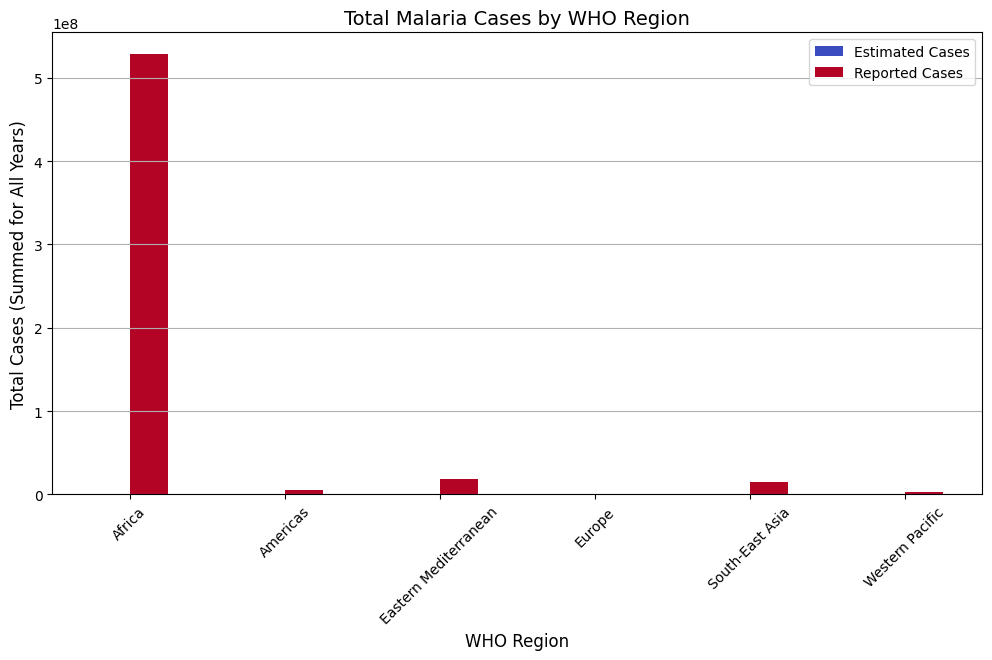

In [31]:

# Plotting the aggregated data
plt.figure(figsize=(12,6))
regional_cases.plot(kind='bar', figsize=(12,6), colormap='coolwarm')

# Adding labels and title
plt.xlabel("WHO Region", fontsize=12)
plt.ylabel("Total Cases (Summed for All Years)", fontsize=12)
plt.title("Total Malaria Cases by WHO Region", fontsize=14)
plt.xticks(rotation=45)
plt.legend(fontsize=10)
plt.grid(axis='y')

# Display the plot
plt.show()


# MALARIA TREND FOR NIGERIA

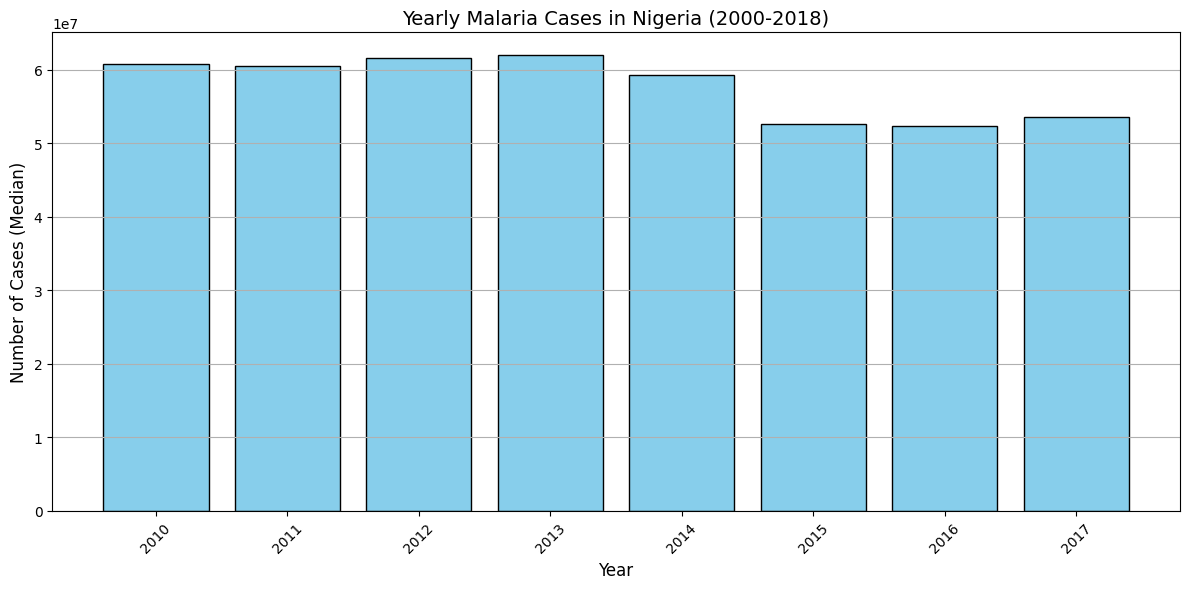

In [32]:

# Filter for Nigeria
df_nigeria = df_merged_filtered[df_merged_filtered['Country'] == 'Nigeria']

# Group by 'Year' and sum 'No. of cases_median'
yearly_cases_nigeria = df_nigeria.groupby('Year')['No. of cases_median'].sum()

# Plotting bar chart
plt.figure(figsize=(12, 6))
plt.bar(yearly_cases_nigeria.index, yearly_cases_nigeria.values, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Cases (Median)', fontsize=12)
plt.title('Yearly Malaria Cases in Nigeria (2000-2018)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Display the plot
plt.show()
